In [34]:
import matplotlib.pyplot as plt
import os 

def print_terrain(terrain, visited, folder = "terrain", count = 0):
    if not os.path.exists(folder):
        os.makedirs(folder)
    terrain = terrain + visited
    plt.matshow(terrain)
    plt.axis('off')
    plt.savefig(f"{folder}/{folder}_frame_{count}.png", bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close()

In [48]:
import matplotlib.image as mgimg
from matplotlib import animation
import shutil

def animate(folder, imgcount):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    myimages = []
    for p in range(imgcount):

        ## Read in picture
        fname = f"{folder}/{folder}_frame_{p}.png"
        img = mgimg.imread(fname)
        imgplot = plt.imshow(img)

        # append AxesImage object to the list
        myimages.append([imgplot])
        
    my_anim = animation.ArtistAnimation(fig, myimages, repeat_delay=1000, interval=100, blit=True)
    my_anim.save(f'{folder}.gif')
    shutil.rmtree(folder)


In [52]:
import numpy as np

def bfs(terrain, location, target, a, folder = "terrain"):
    queue = [(location, 0, terrain[location[0]][location[1]])]
    visited = np.zeros((len(terrain), len(terrain[0])))
    count = 0
    imgcount = 0
    animation_speed = 150
    while(len(queue) > 0):
        if(count % animation_speed == 0):
            imgcount += 1
            print_terrain(a, visited, folder, count // animation_speed)
        count += 1
        if(count > 30000): break
        current = queue.pop(0)
        depth = current[1]
        current = current[0]
        if(visited[current[0]][current[1]]): continue
        if(terrain[current[0]][current[1]] == target):
            animate(folder, imgcount) 
            return (depth, visited)
        if(current[0] < len(terrain) - 1 and (terrain[current[0] + 1][current[1]] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0] + 1, current[1]), depth + 1, terrain[current[0] + 1][current[1]]))
        if(current[0] > 0 and (terrain[current[0] - 1][current[1]] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0] - 1, current[1]), depth + 1, terrain[current[0] - 1][current[1]]))
        if(current[1] < len(terrain[0]) - 1 and (terrain[current[0]][current[1] + 1] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0], current[1] + 1), depth + 1, terrain[current[0]][current[1] + 1]))
        if(current[1] > 0 and (terrain[current[0]][current[1] - 1] - terrain[current[0]][current[1]]) <= 1):
            queue.append(((current[0], current[1] - 1), depth + 1, terrain[current[0]][current[1] - 1]))
        visited[current[0]][current[1]] = 35
    animate(folder, imgcount)
    return depth, visited

(20, 0)


MovieWriter ffmpeg unavailable; using Pillow instead.


462


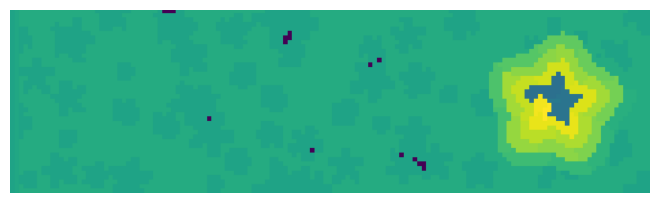

In [53]:
# Read input from file
import numpy as np
with open('input.txt', 'r') as f:
    input = f.read()
input = input.split('\n')
start = [[(i,j) if x == 'S' else 0 for j,x in enumerate(y)] for i, y in enumerate(input)]
start = next(filter(lambda x: x, [item for sublist in start for item in sublist]))
print(start)
terrain = [[ord(i) - ord('a') + 1 if ord(i) - ord('a') + 1 > 0 else (1 if i == 'S' else 26) for i in y] for y in input]
# a 2D array with linearly increasing values on the diagonal
a = np.array(terrain)
depth, visited = bfs(terrain, start, 26, a, "bfs")
print(depth)

(20, 120)


MovieWriter ffmpeg unavailable; using Pillow instead.


451


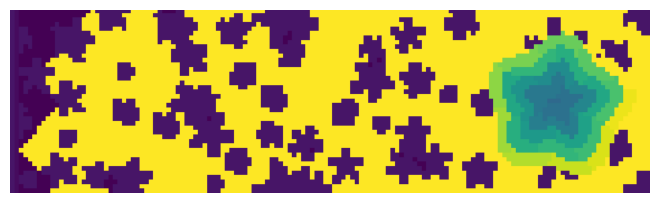

In [54]:
# Read input from file
import numpy as np
with open('input.txt', 'r') as f:
    input = f.read()
input = input.split('\n')
start = [[(i,j) if x == 'E' else 0 for j,x in enumerate(y)] for i, y in enumerate(input)]
start = next(filter(lambda x: x, [item for sublist in start for item in sublist]))
print(start)
terrain = [[27 - (ord(i) - ord('a') + 1) if (ord(i) - ord('a') + 1) > 0 else (1 if i == 'E' else 26) for i in y] for y in input]
# a 2D array with linearly increasing values on the diagonal
a = np.array(terrain)
depth, visited = bfs(terrain, start, 26, a, "bfs_reverse")
print(depth)